<a href="https://colab.research.google.com/github/ThiagoBalbo16/Course-DDS4-FLAI/blob/main/Class_08_Decision_Tree_%26_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course: Curso Dominando Data Science [FLAI] \\
Description: Machine Larning: decision tree and k nearest neighbors \\
Author: FLAI \\
Adapted by : Thiago Balbo Batista \\
Year: 2021

## Machine Learning: KNN and Decision Tree

### Data Import

In [ ]:

# Import the dataset via github:

import pandas as pd
url = 'https://raw.githubusercontent.com/ThiagoBalbo16/Course-Dominando-Data-Science-DDS4-FLAI/main/insurance.csv'
data = pd.read_csv(url)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Mise en Place to the Modeling

In [ ]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['charges'] = data['charges']/1000 
data = data[['bmi', 'smoker', 'charges']]
data.head()


,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


### Upgrade the Holdout Validation: Repeated Holdout

Make the repeated holdout, varying the training and test samples. Store the MSE results in each repetition and calculate the mean to obtain the most stable MSE.

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
import numpy as np

R = 1000
mses = []
maes = []

X = data[['bmi', 'smoker']]
y = data['charges'] 

for i in range(R):
    Xtraining, Xtest, ytraining, ytest  = train_test_split(X, y, test_size = 0.25)
    reg = LinearRegression()
    reg.fit(Xtraining, ytraining)
    predicted = reg.predict(Xtest)
    mse = mean_squared_error(ytest, predicted)
    mae = np.mean(abs(ytest - predicted))
    mses.append(mse)
    maes.append(mae)
    
print(np.mean(mses))
print(np.mean(maes))

50.321730187304276
5.415716865411962


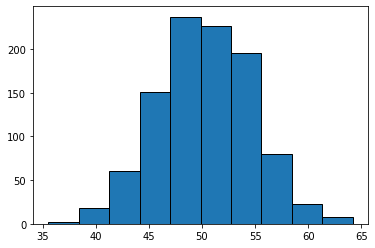

In [ ]:
import matplotlib.pyplot as plt

plt.hist(mses, edgecolor = 'black')
plt.show()

### Model: K-Nearest Neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k = 15

R = 100
mses_training = []
mses_test = []

X = data[['bmi']]
y = data['charges'] 

for i in range(R):
    Xtraining, Xtest, ytraining, ytest  = train_test_split(X, y, test_size = 0.25)

    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(Xtraining, ytraining) 

    predicted_training = knn.predict(Xtraining)
    mse_training = mean_squared_error(predicted_training, ytraining)
    mses_training.append(mse_training)

    predicted_test = knn.predict(Xtest)
    mse_test = mean_squared_error(predicted_test, ytest)
    mses_test.append(mse_test)
 
print('The Training Mean Square Errors is: {:.2f}'.format(np.mean(mses_training)))
print('The Test Mean Square Errors is:  {:.2f}'.format(np.mean(mses_test)))

The Training Mean Square Errors is: 131.47
The Test Mean Square Errors is:  150.09


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X = data[['bmi']]
y = data['charges'] 
k = 15

Xtraining, Xtest, ytraining, ytest  = train_test_split(X, y, test_size = 0.25)
knn = KNeighborsRegressor(n_neighbors = k)
reg = knn.fit(Xtraining, ytraining) 

predicted_training = knn.predict(Xtraining)

predicted_training



array([ 8.59193189, 12.12515312,  6.27682328, ..., 16.44329612,
       10.72378288, 10.13095208])

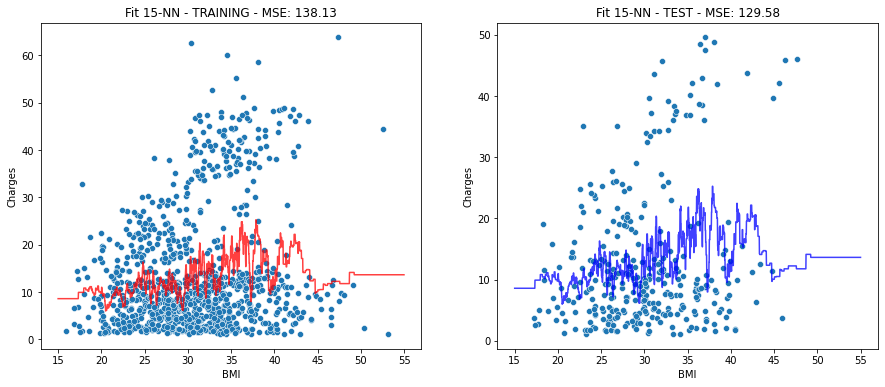

In [ ]:

# KNN Graphic with 1 Variable:

import matplotlib.pyplot as plt
import seaborn as sns

X = data[['bmi']]
y = data['charges']

Xtraining, Xtest, ytraining, ytest  = train_test_split(X, y, test_size = 0.25)

knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(Xtraining, ytraining)

predicted_training = knn.predict(Xtraining)
predicted_test = knn.predict(Xtest)

mse_training = mean_squared_error(predicted_training, ytraining)
mse_test = mean_squared_error(predicted_test, ytest) 

x = np.arange(15, 55, 0.01)
y = knn.predict(pd.DataFrame({'bmi': x}))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtraining['bmi'], y = ytraining)
plt.plot(x, y, color = 'red', alpha = 0.75)
plt.title('Fit {}-NN - TRAINING - MSE: '.format(k) + str(round(mse_training, 2)))
plt.xlabel('BMI')
plt.ylabel('Charges')  

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xtest['bmi'], y = ytest)
plt.plot(x, y, color = 'blue', alpha = 0.75)
plt.title('Fit {}-NN - TEST - MSE: '.format(k) + str(round(mse_test, 2)))
plt.xlabel('BMI')
plt.ylabel('Charges') 
plt.show()

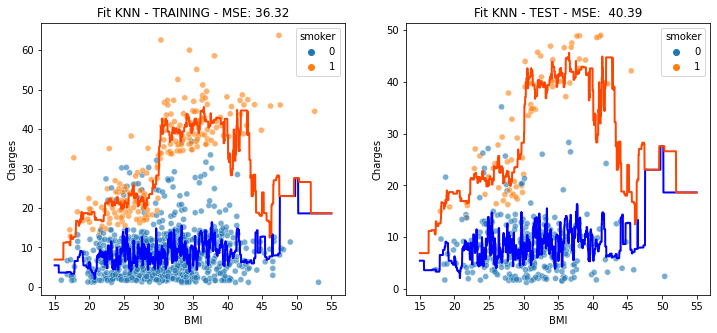

In [ ]:
# KNN Graphic with 2 Variables:

X = data[['bmi', 'smoker']]
y = data['charges'] 

Xtraining, Xtest, ytraining, ytest  = train_test_split(X, y, test_size = 0.25)

k = 7

model = KNeighborsRegressor(n_neighbors = k)
model.fit(Xtraining, ytraining)

predicted_training = model.predict(Xtraining)
predicted_test = model.predict(Xtest)

mse_training = mean_squared_error(predicted_training, ytraining)
mse_test = mean_squared_error(predicted_test, ytest) 

import numpy as np
 
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = model.predict(c0)
d1 = model.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtraining['bmi'], y = ytraining, hue =  Xtraining['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Fit KNN - TRAINING - MSE: ' + str(round(mse_training, 2)))
plt.xlabel('BMI')
plt.ylabel('Charges')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xtest['bmi'], y = ytest, hue =  Xtest['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title('Fit KNN - TEST - MSE:  ' + str(round(mse_test, 2)))
plt.xlabel('BMI')
plt.ylabel('Charges') 

plt.show()

### Model: Tree Decisions

In [ ]:
from sklearn.tree import DecisionTreeRegressor

depth = 4

R = 100
mses_training = []
mses_test = []

X = data[['bmi', 'smoker']]
y = data['charges'] 

for i in range(R):
    Xtraining, Xtest, ytraining, ytest  = train_test_split(X, y, test_size = 0.25)

    tree = DecisionTreeRegressor(max_depth = depth)
    tree.fit(Xtraining, ytraining) 

    predicted_training = tree.predict(Xtraining)
    mse_training = mean_squared_error(predicted_training, ytraining)
    mses_training.append(mse_training)

    predicted_test = tree.predict(Xtest)
    mse_test = mean_squared_error(predicted_test, ytest)
    mses_test.append(mse_test)
 
print('The Training Mean Square Errors is: {:.2f}'.format(np.mean(mses_training)))
print('The Test Mean Square Errors is:  {:.2f}'.format(np.mean(mses_test)))

The Training Mean Square Errors is: 32.04
The Test Mean Square Errors is:  36.55


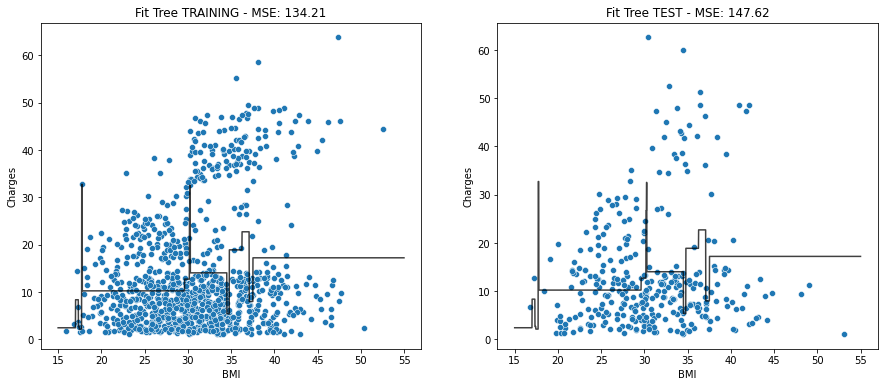

In [ ]:
# Graphic with 1 Variable:

import matplotlib.pyplot as plt
import seaborn as sns

X = data[['bmi']]
y = data['charges']

Xtraining, Xtest, ytraining, ytest  = train_test_split(X, y, test_size = 0.25)

tree = DecisionTreeRegressor(max_depth = depth)
tree.fit(Xtraining, ytraining)

predicted_training = tree.predict(Xtraining)
predicted_test = tree.predict(Xtest)

mse_training = mean_squared_error(predicted_training, ytraining)
mse_test = mean_squared_error(predicted_test, ytest) 

import numpy as np

x = np.arange(15, 55, 0.01)
y = tree.predict(pd.DataFrame({'bmi': x}))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtraining['bmi'], y = ytraining)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Fit Tree TRAINING - MSE: '.format(k) + str(round(mse_training, 2)))
plt.xlabel('BMI')
plt.ylabel('Charges')  

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xtest['bmi'], y = ytest)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Fit Tree TEST - MSE: '.format(k) + str(round(mse_test, 2)))
plt.xlabel('BMI')
plt.ylabel('Charges')  
plt.show()

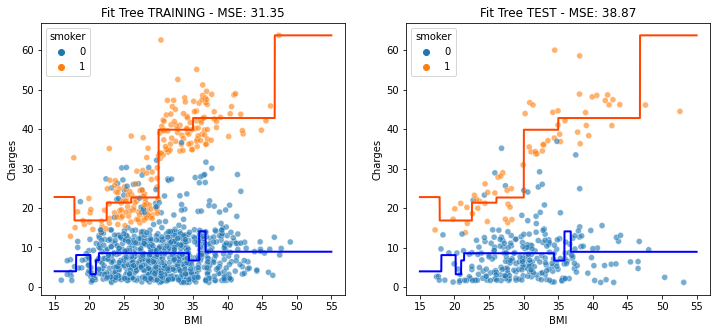

In [ ]:

# Graphic with 2 Variables:

X = data[['bmi', 'smoker']]
y = data['charges'] 

Xtraining, Xtest, ytraining, ytest  = train_test_split(X, y, test_size = 0.25)
 
tree = DecisionTreeRegressor(max_depth = depth)
tree.fit(Xtraining, ytraining)

predicted_training = tree.predict(Xtraining)
predicted_test = tree.predict(Xtest)

mse_training = mean_squared_error(predicted_training, ytraining)
mse_test = mean_squared_error(predicted_test, ytest) 

import numpy as np
 
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = tree.predict(c0)
d1 = tree.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtraining['bmi'], y = ytraining, hue =  Xtraining['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Fit Tree TRAINING - MSE: ' + str(round(mse_training, 2)))
plt.xlabel('BMI')
plt.ylabel('Charges')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xtest['bmi'], y = ytest, hue =  Xtest['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title('Fit Tree TEST - MSE: ' + str(round(mse_test, 2)))
plt.xlabel('BMI')
plt.ylabel('Charges')  


plt.show()

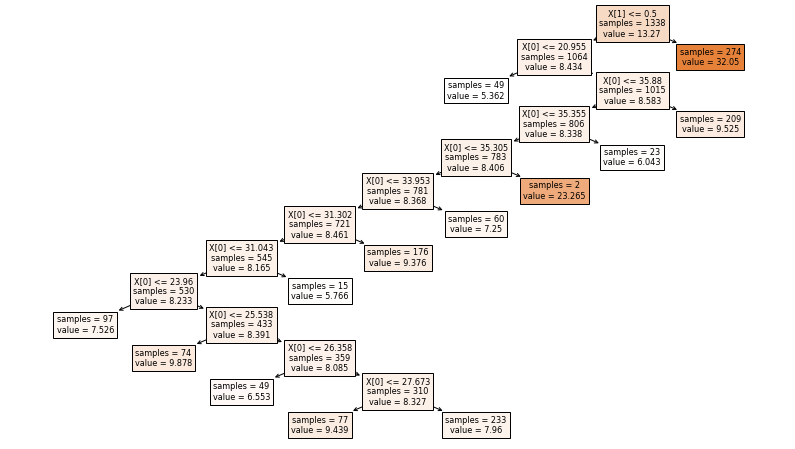

In [ ]:

# The Tree Decisions Graphic

from sklearn.tree import plot_tree

X = data[['bmi', 'smoker']]
y = data['charges']

tree = DecisionTreeRegressor(min_samples_split = 300)
tree.fit(X, y)

plt.figure(figsize = (14, 8))
plot_tree(tree, filled=True, proportion = False, impurity = False)
plt.show()

### Comparing the KNN and Tree Decisions Models

In [ ]:
def RepeatedHoldout(model, replicas = 50, proportion = 0.25): 

    mses_training = []
    mses_test = []

    for i in range(replicas):
        Xtraining , Xtest, ytraining, ytest  = train_test_split(X, y, test_size = proportion)
        
        #Training the model
        reg = model
        reg.fit(Xtraining, ytraining)

        #Cheking the mse in the training
        predicted_training = reg.predict(Xtraining) 
        mse_training = mean_squared_error(ytraining, predicted_training)

        #Cheking the mse in the test
        predicted_test = reg.predict(Xtest)
        mse_test = mean_squared_error(ytest, predicted_test)

        #Storing the results
        mses_training.append(mse_training)
        mses_test.append(mse_test)
    
    res_training = np.array(mses_training).mean().round(2)
    res_test = np.array(mses_test).mean().round(2)

    print('Mean MSE - TRAINING: {}'.format(res_training))
    print('Mean MSE - TEST: {}'.format(res_test))

    return res_training, res_test

In [ ]:
RepeatedHoldout(model = LinearRegression())

Mean MSE - TRAINING: 50.34
Mean MSE - TEST: 49.71


(50.34, 49.71)

In [ ]:
RepeatedHoldout(model = KNeighborsRegressor())

Mean MSE - TRAINING: 31.37
Mean MSE - TEST: 47.51


(31.37, 47.51)

In [ ]:
RepeatedHoldout(DecisionTreeRegressor())

Mean MSE - TRAINING: 15.27
Mean MSE - TEST: 58.97


(15.27, 58.97)

In [ ]:
X = data[['bmi', 'smoker']]
y = data['charges']

models = [LinearRegression(), 
           KNeighborsRegressor(n_neighbors = 5), 
           KNeighborsRegressor(n_neighbors = 15),
           KNeighborsRegressor(n_neighbors = 25),
           KNeighborsRegressor(n_neighbors = 35),
           KNeighborsRegressor(n_neighbors = 45),
           DecisionTreeRegressor(max_depth = 1),
           DecisionTreeRegressor(max_depth = 2),
           DecisionTreeRegressor(max_depth = 3),
           DecisionTreeRegressor(max_depth = 4),
           DecisionTreeRegressor(max_depth = 5)]

names = ['Linear Regression',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45',
         'Decision Tree - Depth = 1',
         'Decision Tree - Depth  = 2',
         'Decision Tree - Depth  = 3',
         'Decision Tree- Depth  = 4',
         'Decision Tree- Depth  = 5']

trainings = []
tests = []

for model in models:
    results = RepeatedHoldout(model)
    trainings.append(results[0])
    tests.append(results[1])

aux = {'MSE Training': trainings, 'MSE Test': tests}
results = pd.DataFrame(aux, index = names)
results.sort_values(by = 'MSE Test')

Mean MSE - TRAINING: 49.82
Mean MSE - TEST: 51.28
Mean MSE - TRAINING: 31.14
Mean MSE - TEST: 47.95
Mean MSE - TRAINING: 44.05
Mean MSE - TEST: 50.9
Mean MSE - TRAINING: 54.48
Mean MSE - TEST: 59.64
Mean MSE - TRAINING: 67.37
Mean MSE - TEST: 74.17
Mean MSE - TRAINING: 80.06
Mean MSE - TEST: 86.45
Mean MSE - TRAINING: 55.82
Mean MSE - TEST: 55.64
Mean MSE - TRAINING: 33.98
Mean MSE - TEST: 35.8
Mean MSE - TRAINING: 32.83
Mean MSE - TEST: 35.67
Mean MSE - TRAINING: 32.35
Mean MSE - TEST: 35.55
Mean MSE - TRAINING: 31.06
Mean MSE - TEST: 36.76


,MSE Training,MSE Test
Decision Tree- Depth = 4,32.35,35.55
Decision Tree - Depth = 3,32.83,35.67
Decision Tree - Depth = 2,33.98,35.80
Decision Tree- Depth = 5,31.06,36.76
KNN - K = 5,31.14,47.95
KNN - K = 15,44.05,50.90
Linear Regression,49.82,51.28
Decision Tree - Depth = 1,55.82,55.64
KNN - K = 25,54.48,59.64
KNN - K = 35,67.37,74.17


### Conclusion

Briefly, we can check out that the MSEs are lower with 2 labels variables, and considering the repeated Holdout Validation, the Decision Tree model with depth 4 is the most fitted one. The results show that the insurance health charges are higher as the bmi increases. the level of the charges is higher for smoker clients.